In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [218]:
x_train = np.loadtxt('train_X.csv', delimiter = ',').T
y_train = np.loadtxt('train_label.csv', delimiter = ',').T

x_test = np.loadtxt('test_X.csv', delimiter = ',').T
y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [219]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (784, 1000)
Shape of y_train: (10, 1000)
Shape of x_test: (784, 350)
Shape of y_test: (10, 350)


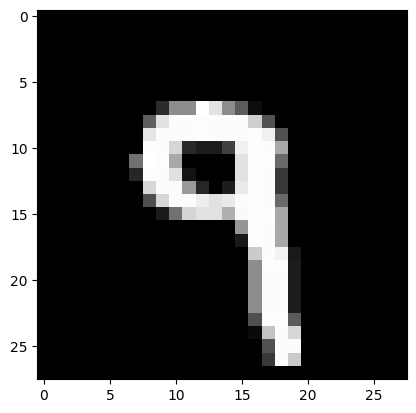

In [220]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

# Model

![nn](Images/2.png)

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


In [221]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [222]:
def derivative_tanh(x):
    return (1 - np.power(x, 2))

def derivative_relu(x):
    return (np.array(x > 0, dtype= np.float32))

## Khoi tao tham so

In [223]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Truyen tham so 

In [224]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

## Loss Function

In [225]:
def const_loss(a2, y):
    m = y.shape[1]
    cost = - (1/m) * np.sum(y * np.log(a2 + 1e-8)) 
    return cost


## Dao ham 

In [226]:
def backward_prop(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = a2 - y
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = np.dot(w2.T, dz2) * derivative_tanh(a1)
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }
    
    return gradients


In [227]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## 🧠 Hàm `model(x, y, n_h, learning_rate, iterations)` — Huấn luyện mạng nơ-ron đơn giản

Hàm `model` thực hiện huấn luyện một mạng nơ-ron với một lớp ẩn (1 hidden layer) theo thuật toán **Gradient Descent**. Dưới đây là giải thích từng phần của hàm.

---

### 🔢 **Tham số đầu vào**
- `x`: Ma trận đầu vào, kích thước `(n_x, m)`, trong đó:
  - `n_x`: số đặc trưng (features)
  - `m`: số lượng mẫu huấn luyện
- `y`: Nhãn thực tế, kích thước `(n_y, m)`
- `n_h`: Số lượng neuron trong lớp ẩn
- `learning_rate`: Tốc độ học (hệ số cập nhật trong Gradient Descent)
- `iterations`: Số lần lặp để huấn luyện mô hình

---

### 🔄 **Quy trình huấn luyện**

```python
n_x = x.shape[0]
n_y = y.shape[0]


In [228]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [229]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.389298915695862
Cost after 10 iterations is : 0.6649297799713354
Cost after 20 iterations is : 0.37433298865907033
Cost after 30 iterations is : 0.2515293415745804
Cost after 40 iterations is : 0.18888679083263415
Cost after 50 iterations is : 0.15212003357699735
Cost after 60 iterations is : 0.12769688837512863
Cost after 70 iterations is : 0.1101083366058156
Cost after 80 iterations is : 0.09655647183683093
Cost after 90 iterations is : 0.08591118756134468


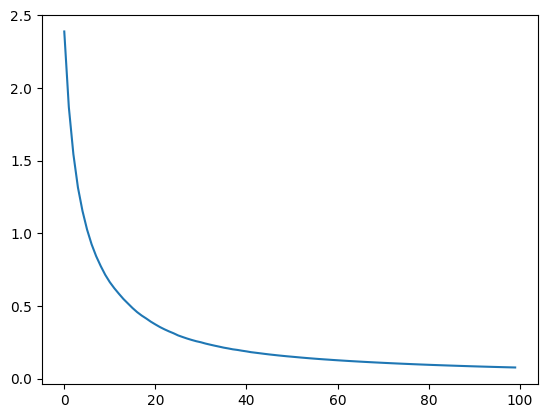

In [230]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [231]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']  
    
    a_out = np.argmax(a_out, 0)  
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [232]:
print("Accuracy of Train Dataset", accuracy(x_train, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.8 %
Accuracy of Test Dataset 86.0 %


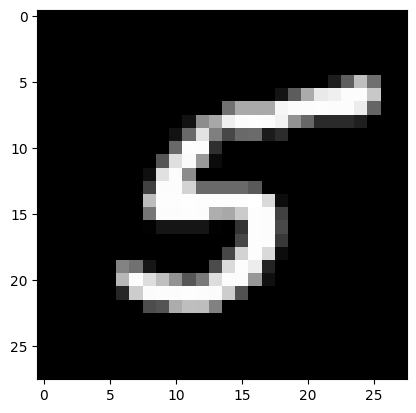

Our model says it is : 5


In [233]:
idx = int(random.randrange(0,x_test.shape[1]))
plt.imshow(x_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(x_test[:, idx].reshape(x_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])